In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters

In [2]:
register_matplotlib_converters()

In [34]:
Ten=pd.read_csv(r'C:\Users\mingj\OneDrive\Desktop\^TNX.csv')


In [35]:
Ten.set_index("Date", inplace = True)

In [36]:
Ten = Ten['Close']


Date
2009-02-01    3.041
2009-03-01    2.685
2009-04-01    3.124
2009-05-01    3.465
2009-06-01    3.523
Name: Close, dtype: float64

In [39]:
Ten = pd.DataFrame(Ten)
Ten.head()

,Close
Date,
2009-02-01,3.041
2009-03-01,2.685
2009-04-01,3.124
2009-05-01,3.465
2009-06-01,3.523


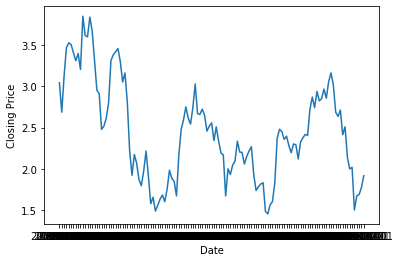

In [40]:
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(Ten)

In [41]:
X = Ten["Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -2.132970
p-value: 0.231466
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Failed to Reject Ho - Time Series is Non-Stationary


In [42]:
Ten_S = Ten.diff().dropna()
Ten_S

,Close
Date,
2009-03-01,-0.356
2009-04-01,0.439
2009-05-01,0.341
2009-06-01,0.058
2009-07-01,-0.022
...,...
2019-08-01,-0.515
2019-09-01,0.169
2019-10-01,0.016


In [44]:
X = Ten_S["Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -10.894188
p-value: 0.000000
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Reject Ho - Time Series is Stationary


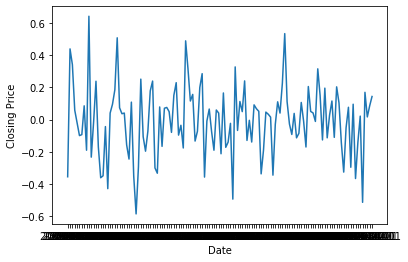

In [45]:
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(Ten_S)

In [48]:
from statsmodels.tsa.stattools import acf, pacf

In [62]:
lag_acf = acf(Ten_S, nlags=20)

C:\Users\mingj\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


In [61]:
lag_pacf = pacf(Ten_S, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

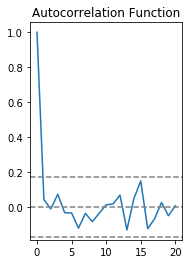

In [63]:
plt.subplot(121)

plt.plot(lag_acf)

plt.axhline(y=0, linestyle='--', color ='gray')

plt.axhline(y=-1.96/np.sqrt(len(Ten_S)), linestyle='--', color ='gray')

plt.axhline(y=1.96/np.sqrt(len(Ten_S)), linestyle='--', color ='gray')

plt.title('Autocorrelation Function')


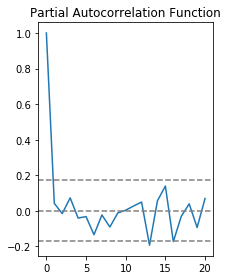

In [66]:
plt.subplot(122)

plt.plot(lag_pacf)

plt.axhline(y=0, linestyle='--', color ='gray')

plt.axhline(y=-1.96/np.sqrt(len(Ten_S)), linestyle='--', color ='gray')

plt.axhline(y=1.96/np.sqrt(len(Ten_S)), linestyle='--', color ='gray')

plt.title('Partial Autocorrelation Function')

plt.tight_layout()

C:\Users\mingj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mingj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


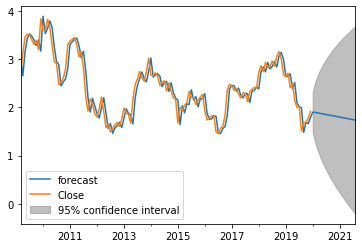

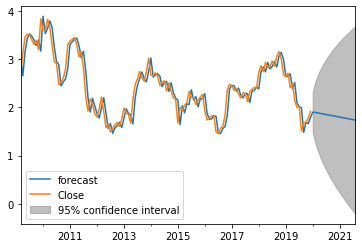

In [74]:
model = ARIMA(Ten, order=(1, 1, 1))
results=model.fit()
results.plot_predict(1, 150)